We start first by importing used modules

In [496]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle

Reading the dataset using pandas, and printing a sample of it to get a hint of what we are working with:

In [497]:
df = pd.read_csv('dataset.csv')
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


To check the size of the dataset we are working with:

In [498]:
df.shape

(5000, 5)

Data wrangling starts with checking if we have any invalid values or missing entries:

In [499]:
# Check if any values are missing
df.isnull().values.any()

False

Checking how categorical our data is:

In [500]:
df.nunique()

Year           4
Major         20
University    10
Time          10
Order         10
dtype: int64

We then start by analyzing our features one by one, as they are on the categorical side, we will check more relevant descriptors like the count, and the biases that could exist:

In [501]:
# Checking for biases
df[['Year']].value_counts()

Year  
Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: count, dtype: int64

We can see a significant gap between the size of data collected for Year 3 and Year 2 students and the rest of the years, that will be a reason why the model will be more biased, and won't predict new entries accurately when year 1 and year 4 are the input at question

<Axes: xlabel='Major'>

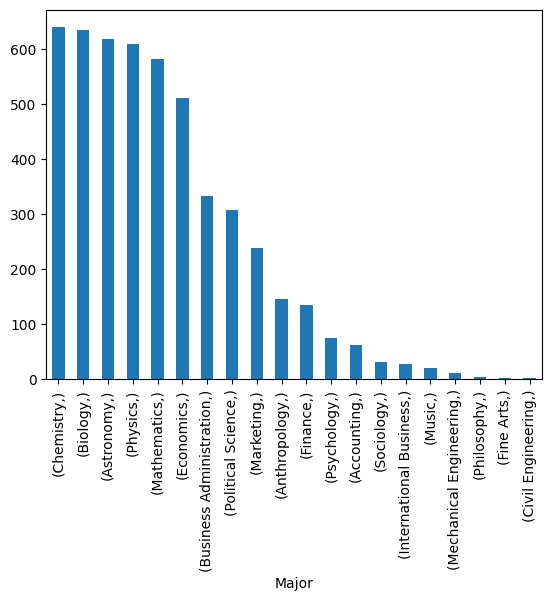

In [502]:
df[['Major']].value_counts().plot(kind='bar')

We can also see the gap in the data collected from different majors, that could be also of some impact, we are going to know for sure when we check the correlation matrix

<Axes: xlabel='University'>

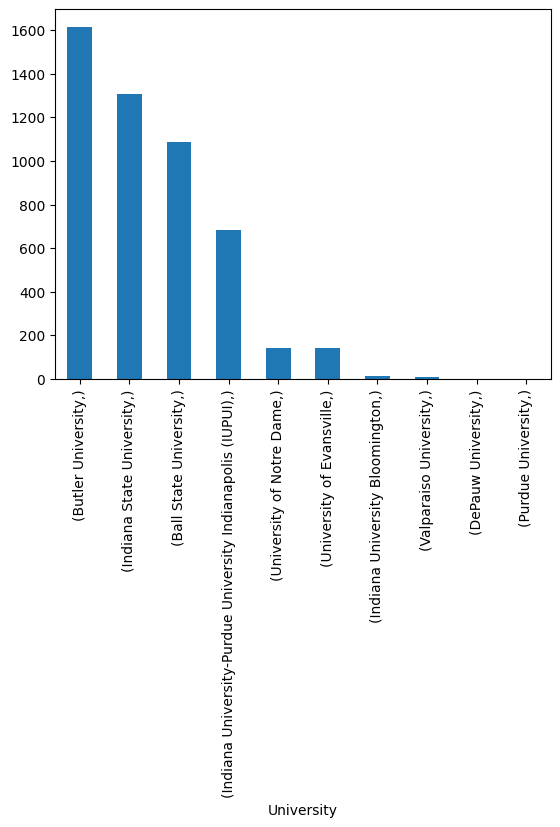

In [503]:
df[['University']].value_counts().plot(kind='bar')

Doing the same for the University feature

Next we are going to see if there are some obvious trends by using histograms between the Year and Time features

<Axes: xlabel='Year'>

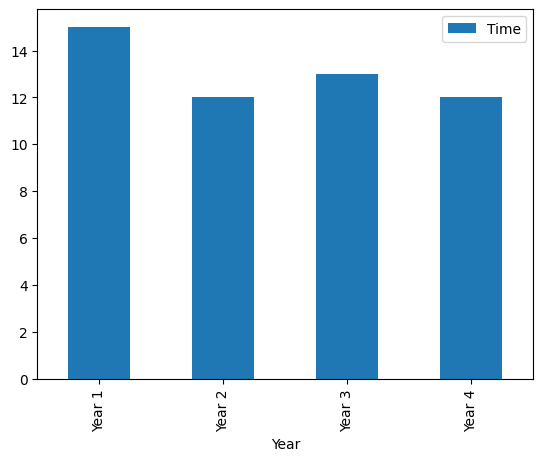

In [504]:
# Average times per year
df[['Year', 'Time']].groupby('Year').median().plot(kind='bar')

Nothing significant to say from the plot, so we are going to move on and visualize the correlation matrix so we can determine which features we should use

First we are going to save the categorical values of the data:

In [505]:
# Extracting values for categorization
orders = df.Order.unique()
majors = df.Major.unique()
unis = df.University.unique()
years = df.Year.unique()

Now we convert categorical data to numeric data:

In [506]:
df.Year = pd.Categorical(df.Year)
df.Year = df.Year.cat.codes
df.Major = pd.Categorical(df.Major)
df.Major = df.Major.cat.codes
df.University = pd.Categorical(df.University)
df.University = df.University.cat.codes
df.Order = pd.Categorical(df.Order)
df.Order = df.Order.cat.codes

We can easily visualize a correlation matrix now:

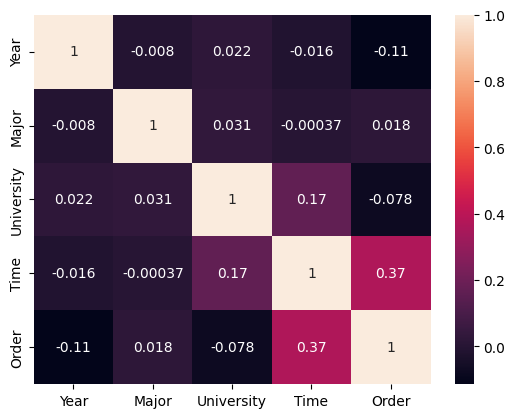

In [507]:
# Feature Space analysis
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

The correlation matrix above basically hints that we are going to rely on the Time feature, as it's the most impactful when it comes to prediction, it also says that there are some correlation between some features, like the Time and University, however, we are going to use all the features anyway, as the correlation isn't that significant, and we have a limited number of features, so no dimension reduction is needed.

We begin by separating labels from features:

In [508]:
X = df.drop('Order', axis=1)
y = df['Order']

Splitting the data into training/testing data:

In [509]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

We are going to use the random forest classifier, the reason is that the data isn't that big to use neural networks, SVMs could also be an option, but after some trials and errors, the random forest classifier worked better

In [510]:
rf = RandomForestClassifier(n_estimators=10)

In [511]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [512]:
y_pred = rf.predict(X_test)

In [513]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.42      0.51       214
           1       0.53      0.56      0.54       194
           2       0.63      0.61      0.62       178
           3       0.64      0.67      0.66       206
           4       0.57      0.56      0.56       209
           5       0.71      0.80      0.75       200
           6       0.76      0.86      0.81       212
           7       0.61      0.61      0.61       198
           8       0.55      0.42      0.47       185
           9       0.62      0.79      0.70       204

    accuracy                           0.63      2000
   macro avg       0.63      0.63      0.62      2000
weighted avg       0.63      0.63      0.62      2000



Finally, we save the model to a file for reusability.

In [514]:
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)